# 10.Azure ML SDKの概要

## Azure Machine Learning ワークスペース

ワークスペースは、機械学習ワークロードに関連付けられた実験、データ、コンピューティング先およびその他の資産のコンテキスト。

### Machine Learning資産用のワークスペース

ワークスペースは、関連する一連の機械学習リソースの境界を定義するもの。  
ワークスペースを使用することで、プロジェクト、デプロイ環境(テストと運用など)、チーム、またはその他の編成の原則に基づいて機械学習リソースをグループ化できる。

ワークスペース内には以下の資産がある。

- 開発、トレーニング、デプロイのためのコンピューティング先
- 実験及びモデルトレーニング用のデータ
- 共有コードとドキュメントを含むノートブック
- 実験(履歴、ログに記録されたメトリック、出力含む)
- トレーニング済みのモデル

### Azureリソースとしてのワークスペース

ワークスペースはAzureリソースなので、ワークスペースをsupportするために必要なその他の関連するAzureリソースとともに、  
Azureサブスクリプションのリソースグループ内に定義される。

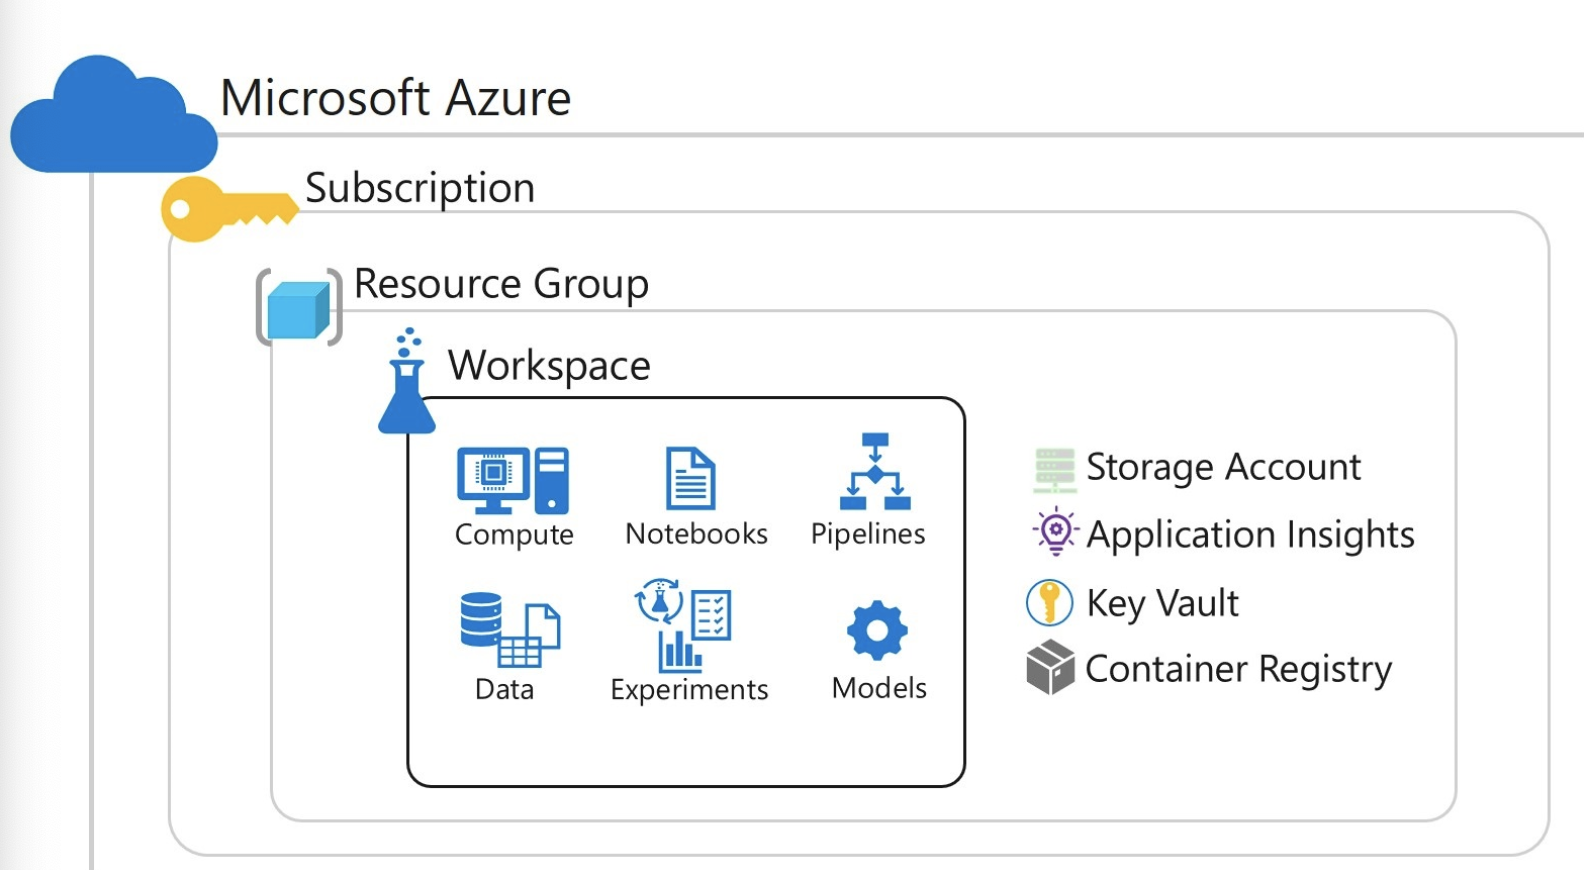

ワークスペースとともに作成されるAzureリソースは次のものがある。

- ストレージアカウント
    - ワークスペースで使用されるファイルと、実験およびモデルトレーニング用のデータを格納するために使用される
- Application Insights
    - ワークスペース内で予測サービスを監視するために使用される
- Azure Key Vault
    - ワークスペースで使用される認証キーや資格情報などのシークレットを管理するために使用される
- コンテナーレジストリ
    - デプロイされたモデルのコンテナーを管理するために必要に応じて作成される

### ロールベースのアクセス制御

ワークスペースにはロールベースの承認ポリシーを割り当てることができる。  
これにより、特定のAzure Active Directoryプリンシパルが実行できるアクションを制限するアクセス許可を管理できる。

### ワークスペースの作成

以下の方法でワークスペースを作成できる。

- Azureポータルで、サブスクリプション、リソースグループ、ワークスペース名を指定して、新しいMachine Learningリソースを作成。
- Azure ML Python SDKを使用して、ワークスペースを作成するコードを実行する。  
たとえば、次のコードによって`aml-workspace`という名前のワークスペースが作成される。  
※Azure ML SDK for Pythonがインストールされ、有効なサブスクリプションIDが指定されていることを前提としている。

```
from azureml.core import Workspace
    
    ws = Workspace.create(name='aml-workspace', 
                      subscription_id='123456-abc-123...',
                      resource_group='aml-resources',
                      create_resource_group=True,
                      location='eastus'
                     )
```

- Azure ML CLI拡張機能を含むAzure CLIを使用する。  
例えば次のコマンドを使用できる　※aml-resourcesという名前のリソースグループが既に作成されていることを前提としてる

```
az ml workspace create -w 'aml-workspace' -g 'aml-resources'
```

- Azure Resource Managerテンプレートを使用する。

# 演習 - ワークスペースを作成する

1. Azureポータルで、新しいMLリソースを作成する。

    - サブスクリプション
    - リソースグループ
    - ワークスペース名
    - リージョン
    - ストレージアカウント
    - Key vault
    - アプリケーション insights
    - コンテナーレジストリ

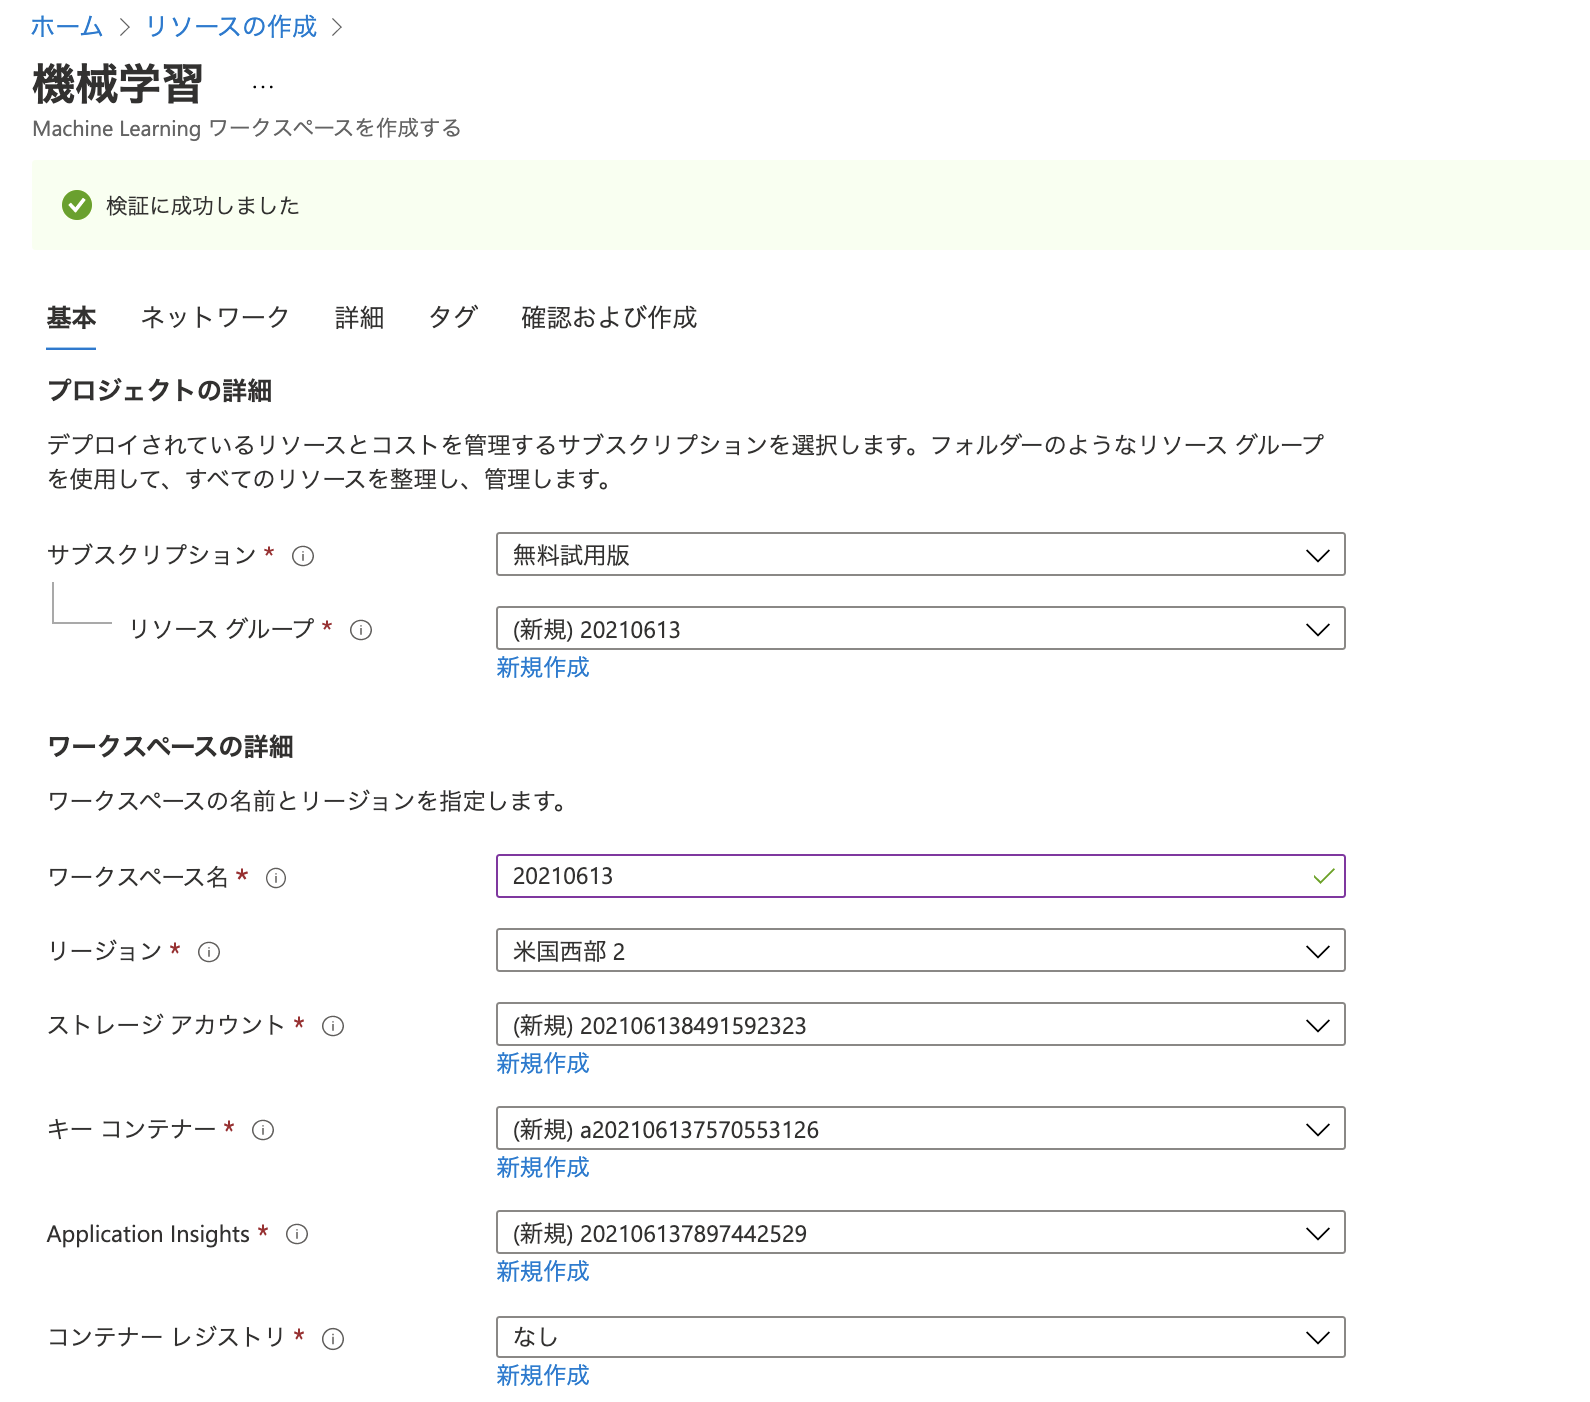

※注:Azure MLワークスペースを作成する際には、高度なオプションを使用してプライベートエンドポイントを介したアクセスを制御したり、  
データ暗号化のカスタムキーを指定したりすることができる。

2. ワークスペースとその関連リソースが作成されたら、ポータルでワークスペースを表示する。

## Azure ML Studioを見る

Azure MLスタジオでは、ワークスペースを操作するための専用Webポータルを提供している。  
スタジオを起動することで、Azure MLスタジオへ移動することができる。

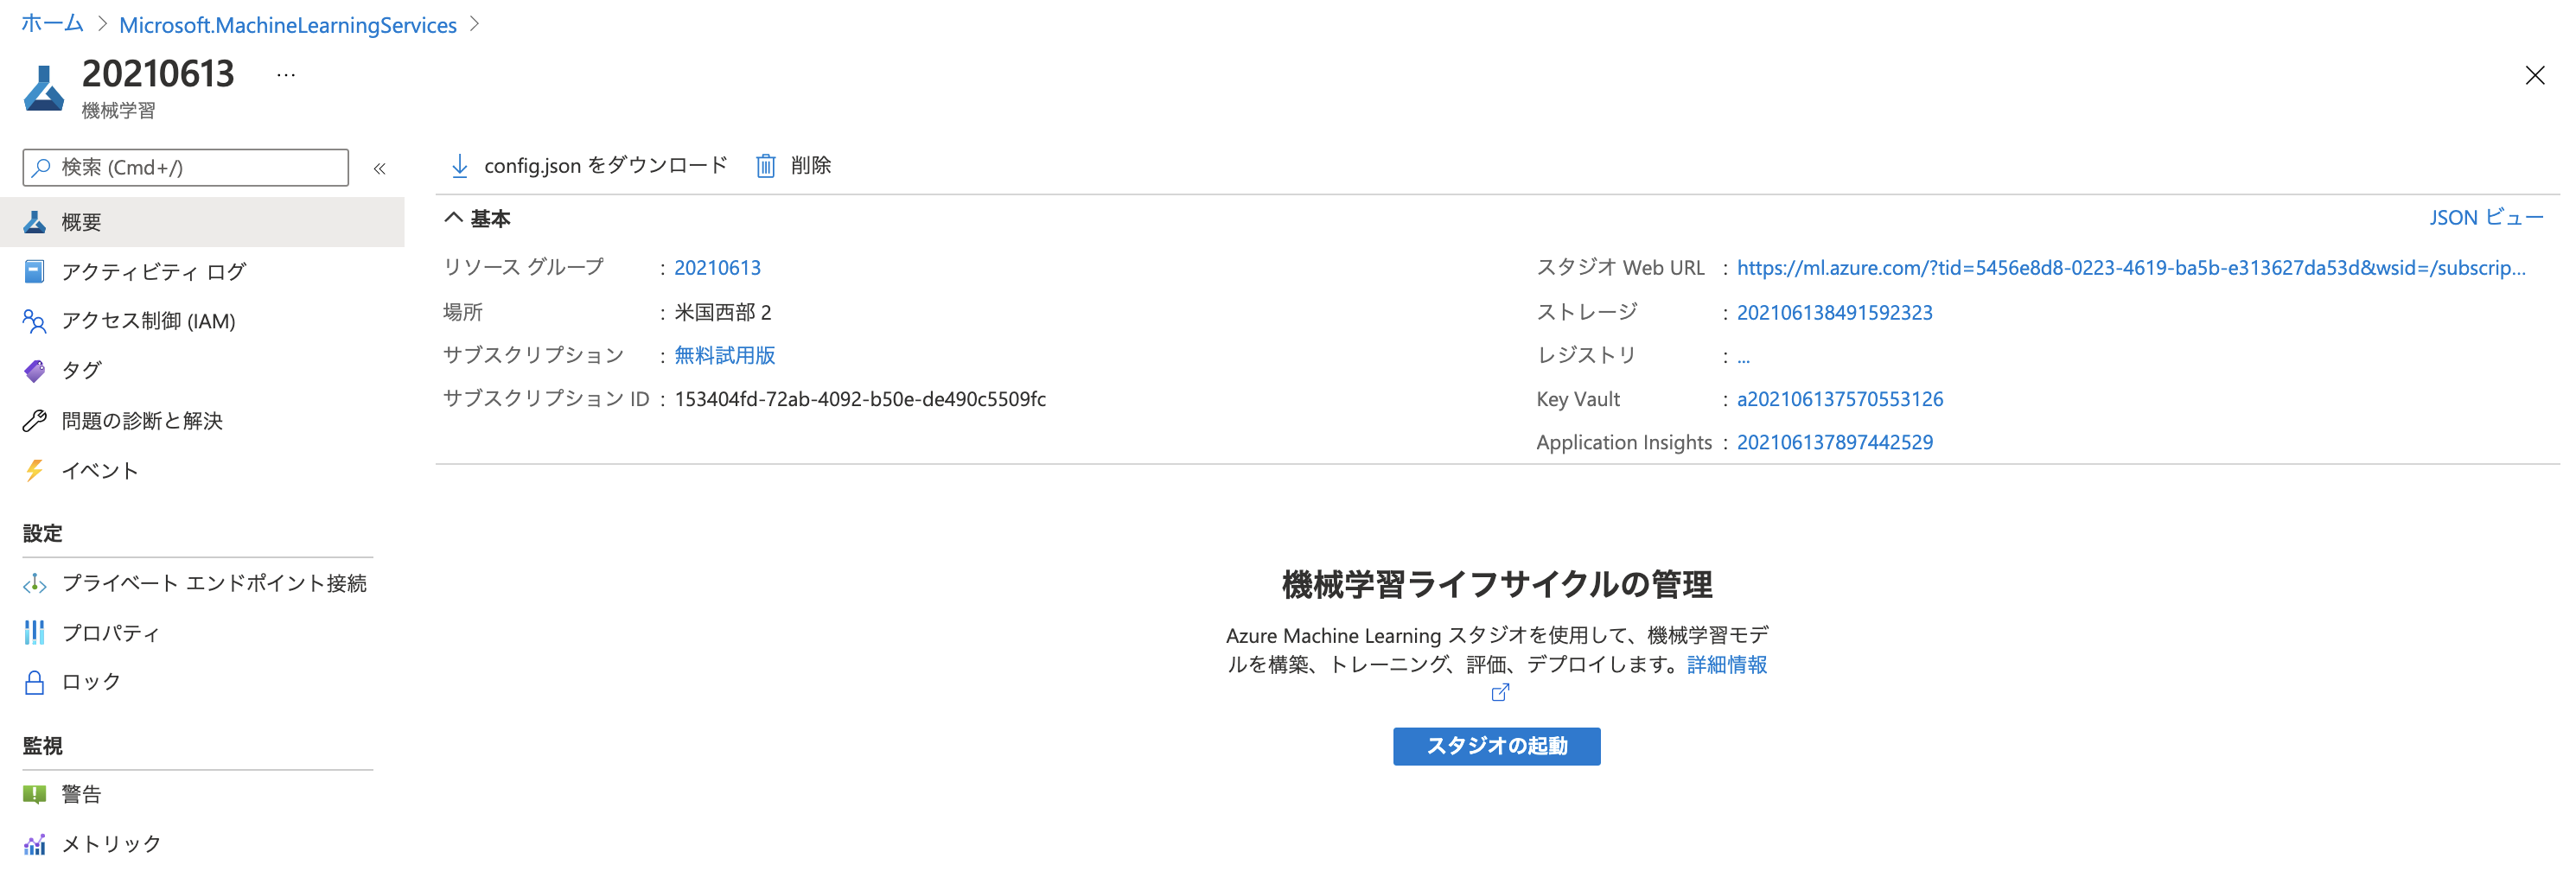

以下のページを使って、ワークスペースのリソースを管理することができる。

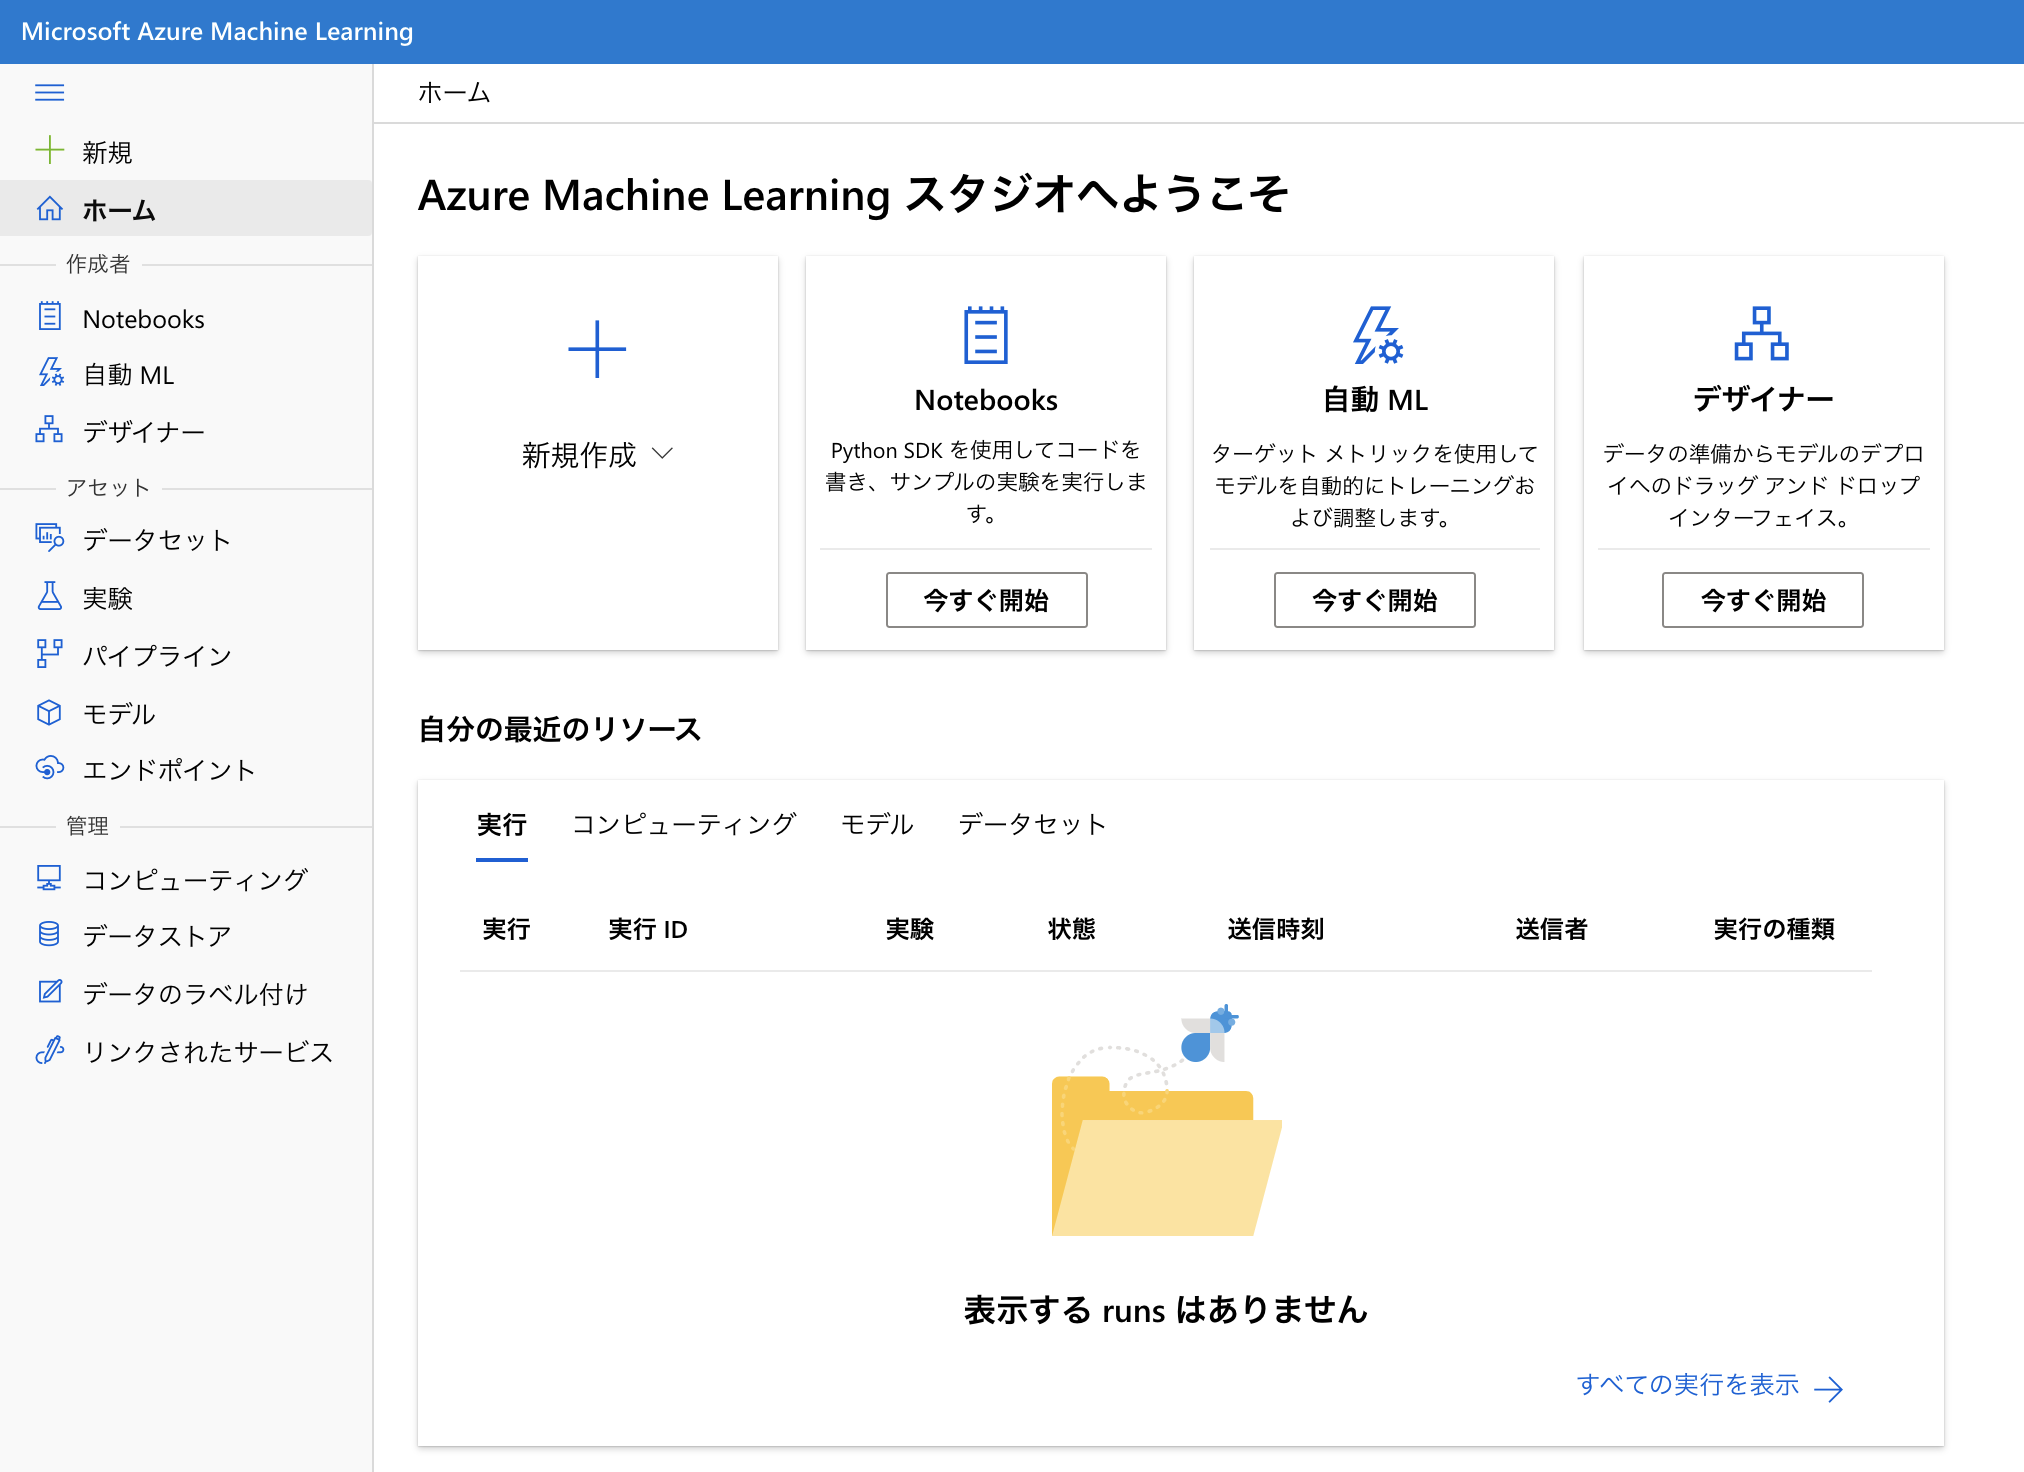

## コンピューティングインスタンスの作成

Azure MLのメリットの一つは、実験やトレーニングスクリプトを大規模に実行できるクラウドベースのコンピューティングを作成できること。

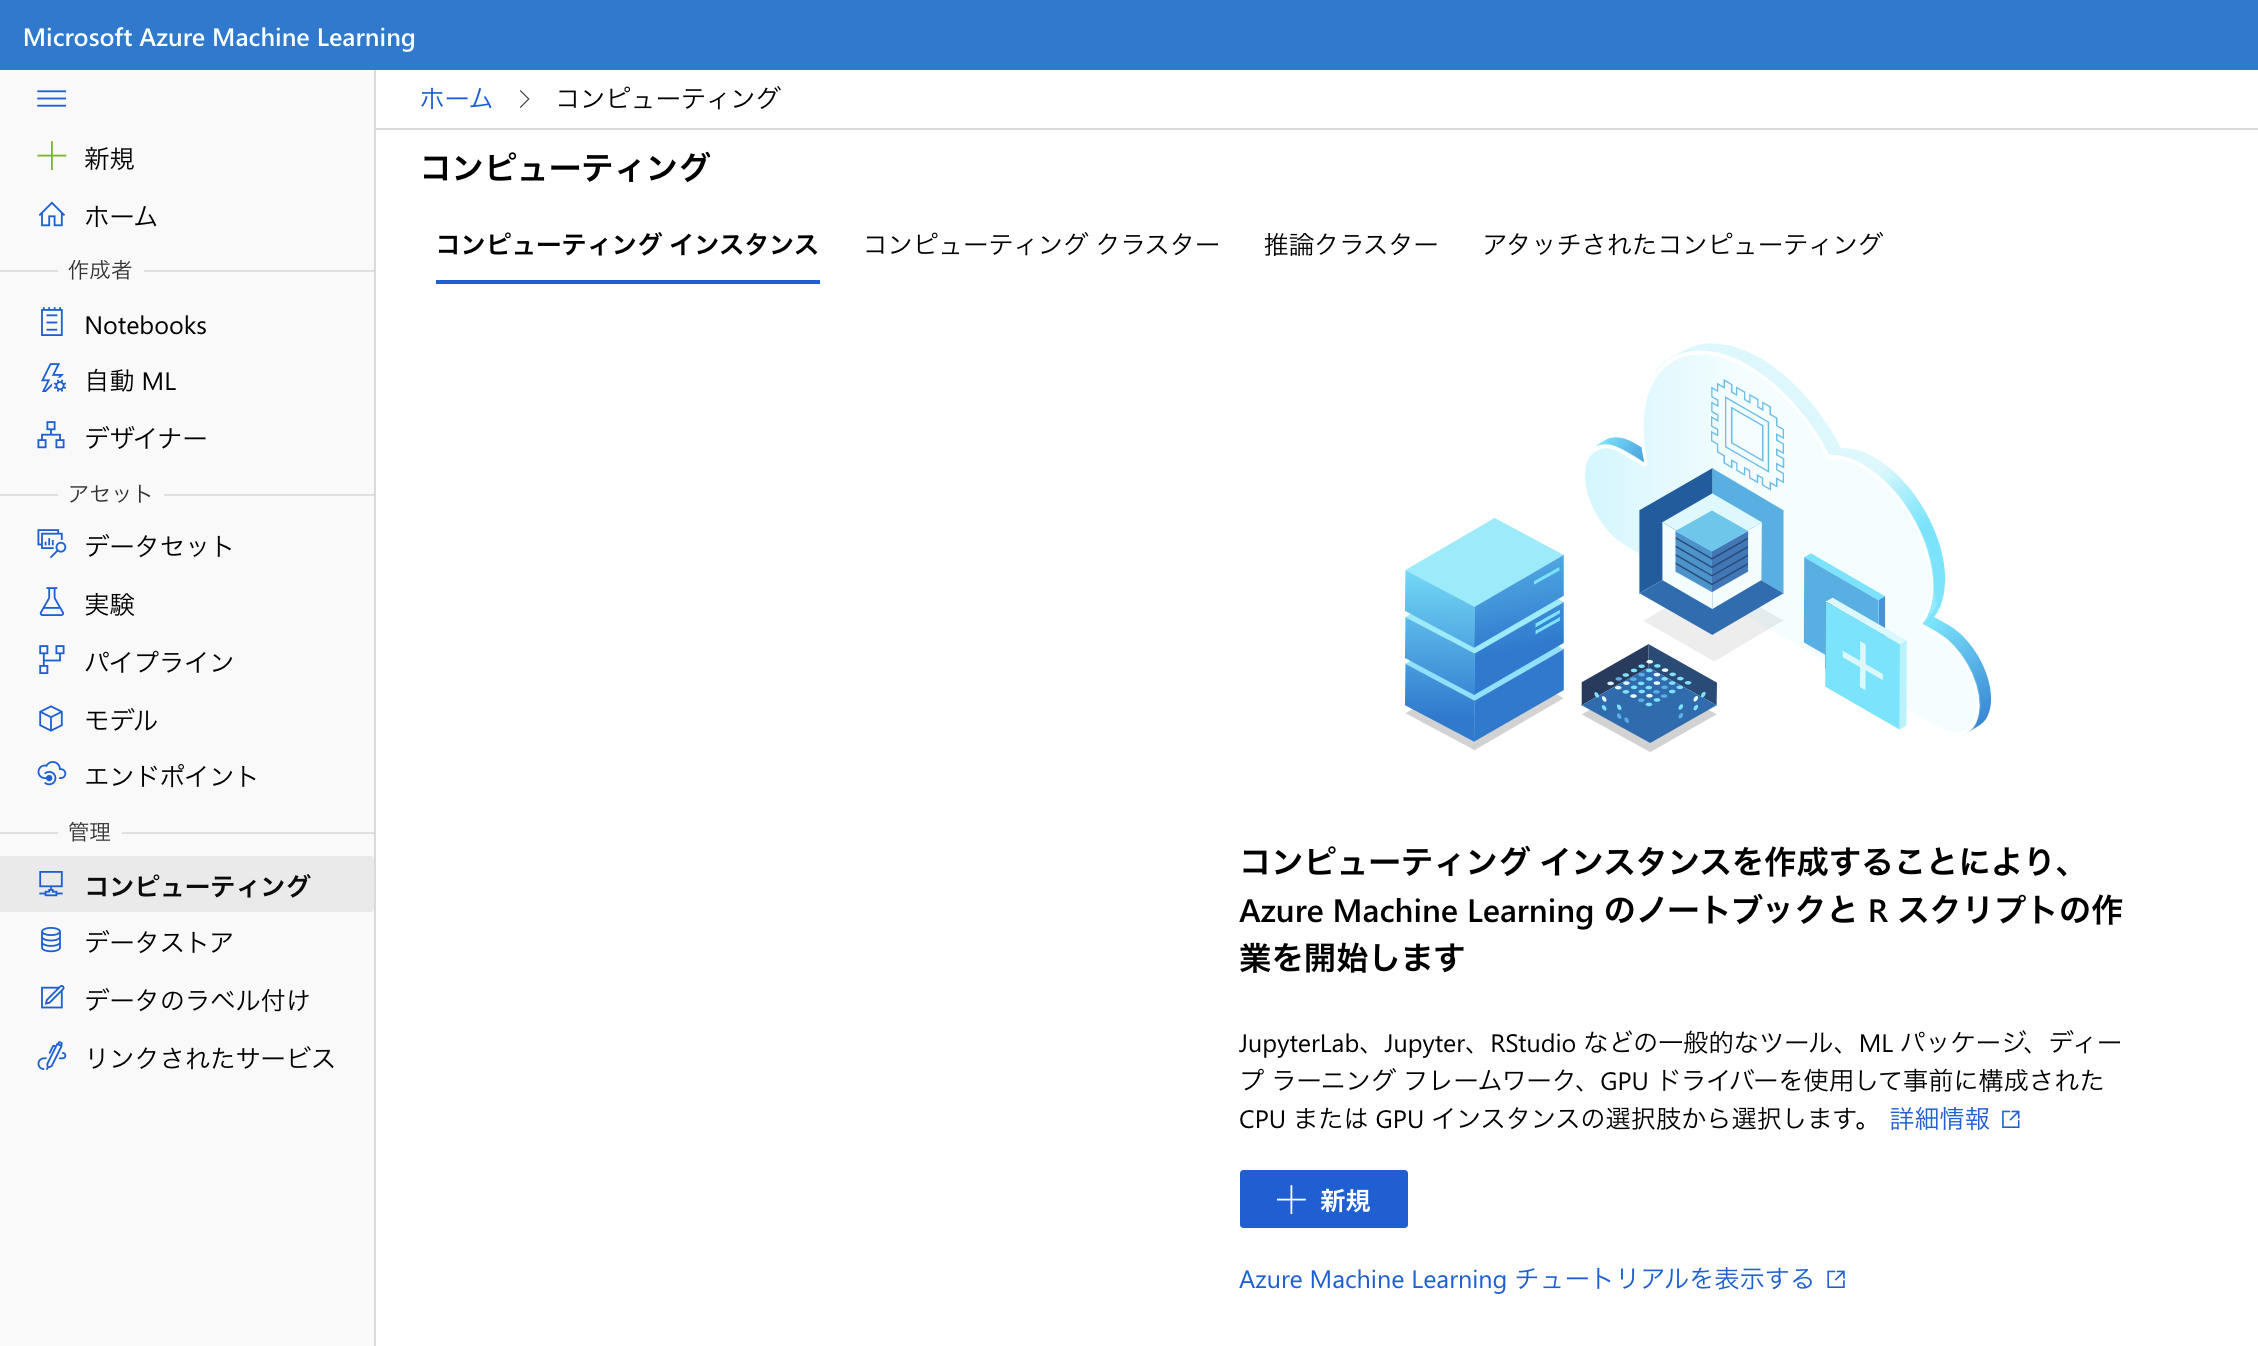

1. **コンピューティング**を表示する。  
ここでは、データサイエンス活動のためのコンピューティングリソースを管理する。作成できるリソースは4種類

    - **コンピューティングインスタンス**
        - データサイエンティストがデータやモデルを扱うために使用する開発ワークステーション
    - **コンピューティングクラスター**
        - 実行コードをオンデマンドに処理するためのスケーラブルな仮想マシンのクラスター
    - **推論クラスター**
        - 訓練されたモデルを使用する予測サービスの導入対象
    - **アタッチされたコンピューティング**
        - 他のAzureコンピューティングリソースへのリンク  
        Virtual MachineやAzure Databricksクラスターなど、他のAzureコンピューティングへのリンク

2. コンピューティングインスタンスより、新しいコンピューティングインスタンスを追加する。  
このインスタンスは、ノートブックでコードを実行するためのワークステーションとして使用する。

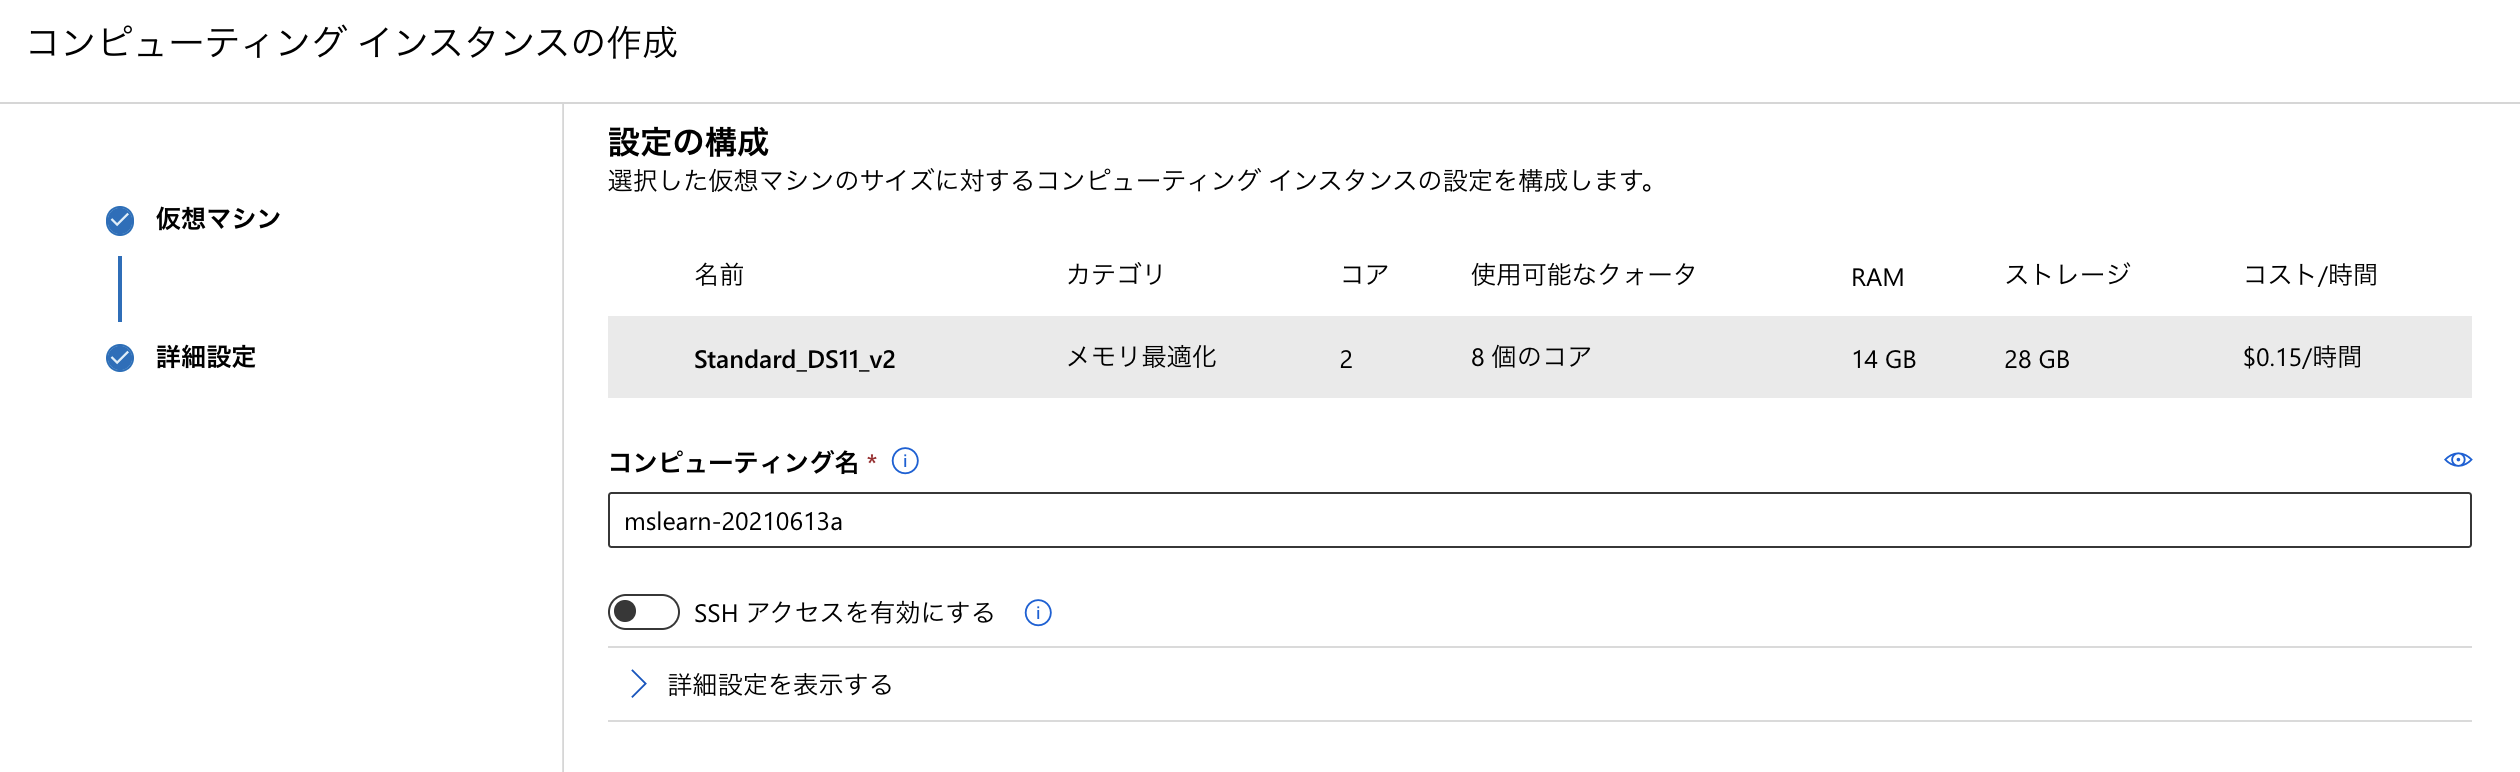

3. コンピューティングが作成されるまで待つ。


## ノートブックのクローンおよび実行

データサイエンスや機械学習の実験の多くは、ノートブックでコードを実行することで行われる。  
あなたのコンピューティングインスタンスには、広範な作業に使用できる全機能のPythonノートブック環境が含まれているが、  
基本的なノートブックの編集には、Azure MLスタジオの組み込みノートブックページを使用できる。

1. Azure MLスタジオで**Notebooks**を開く

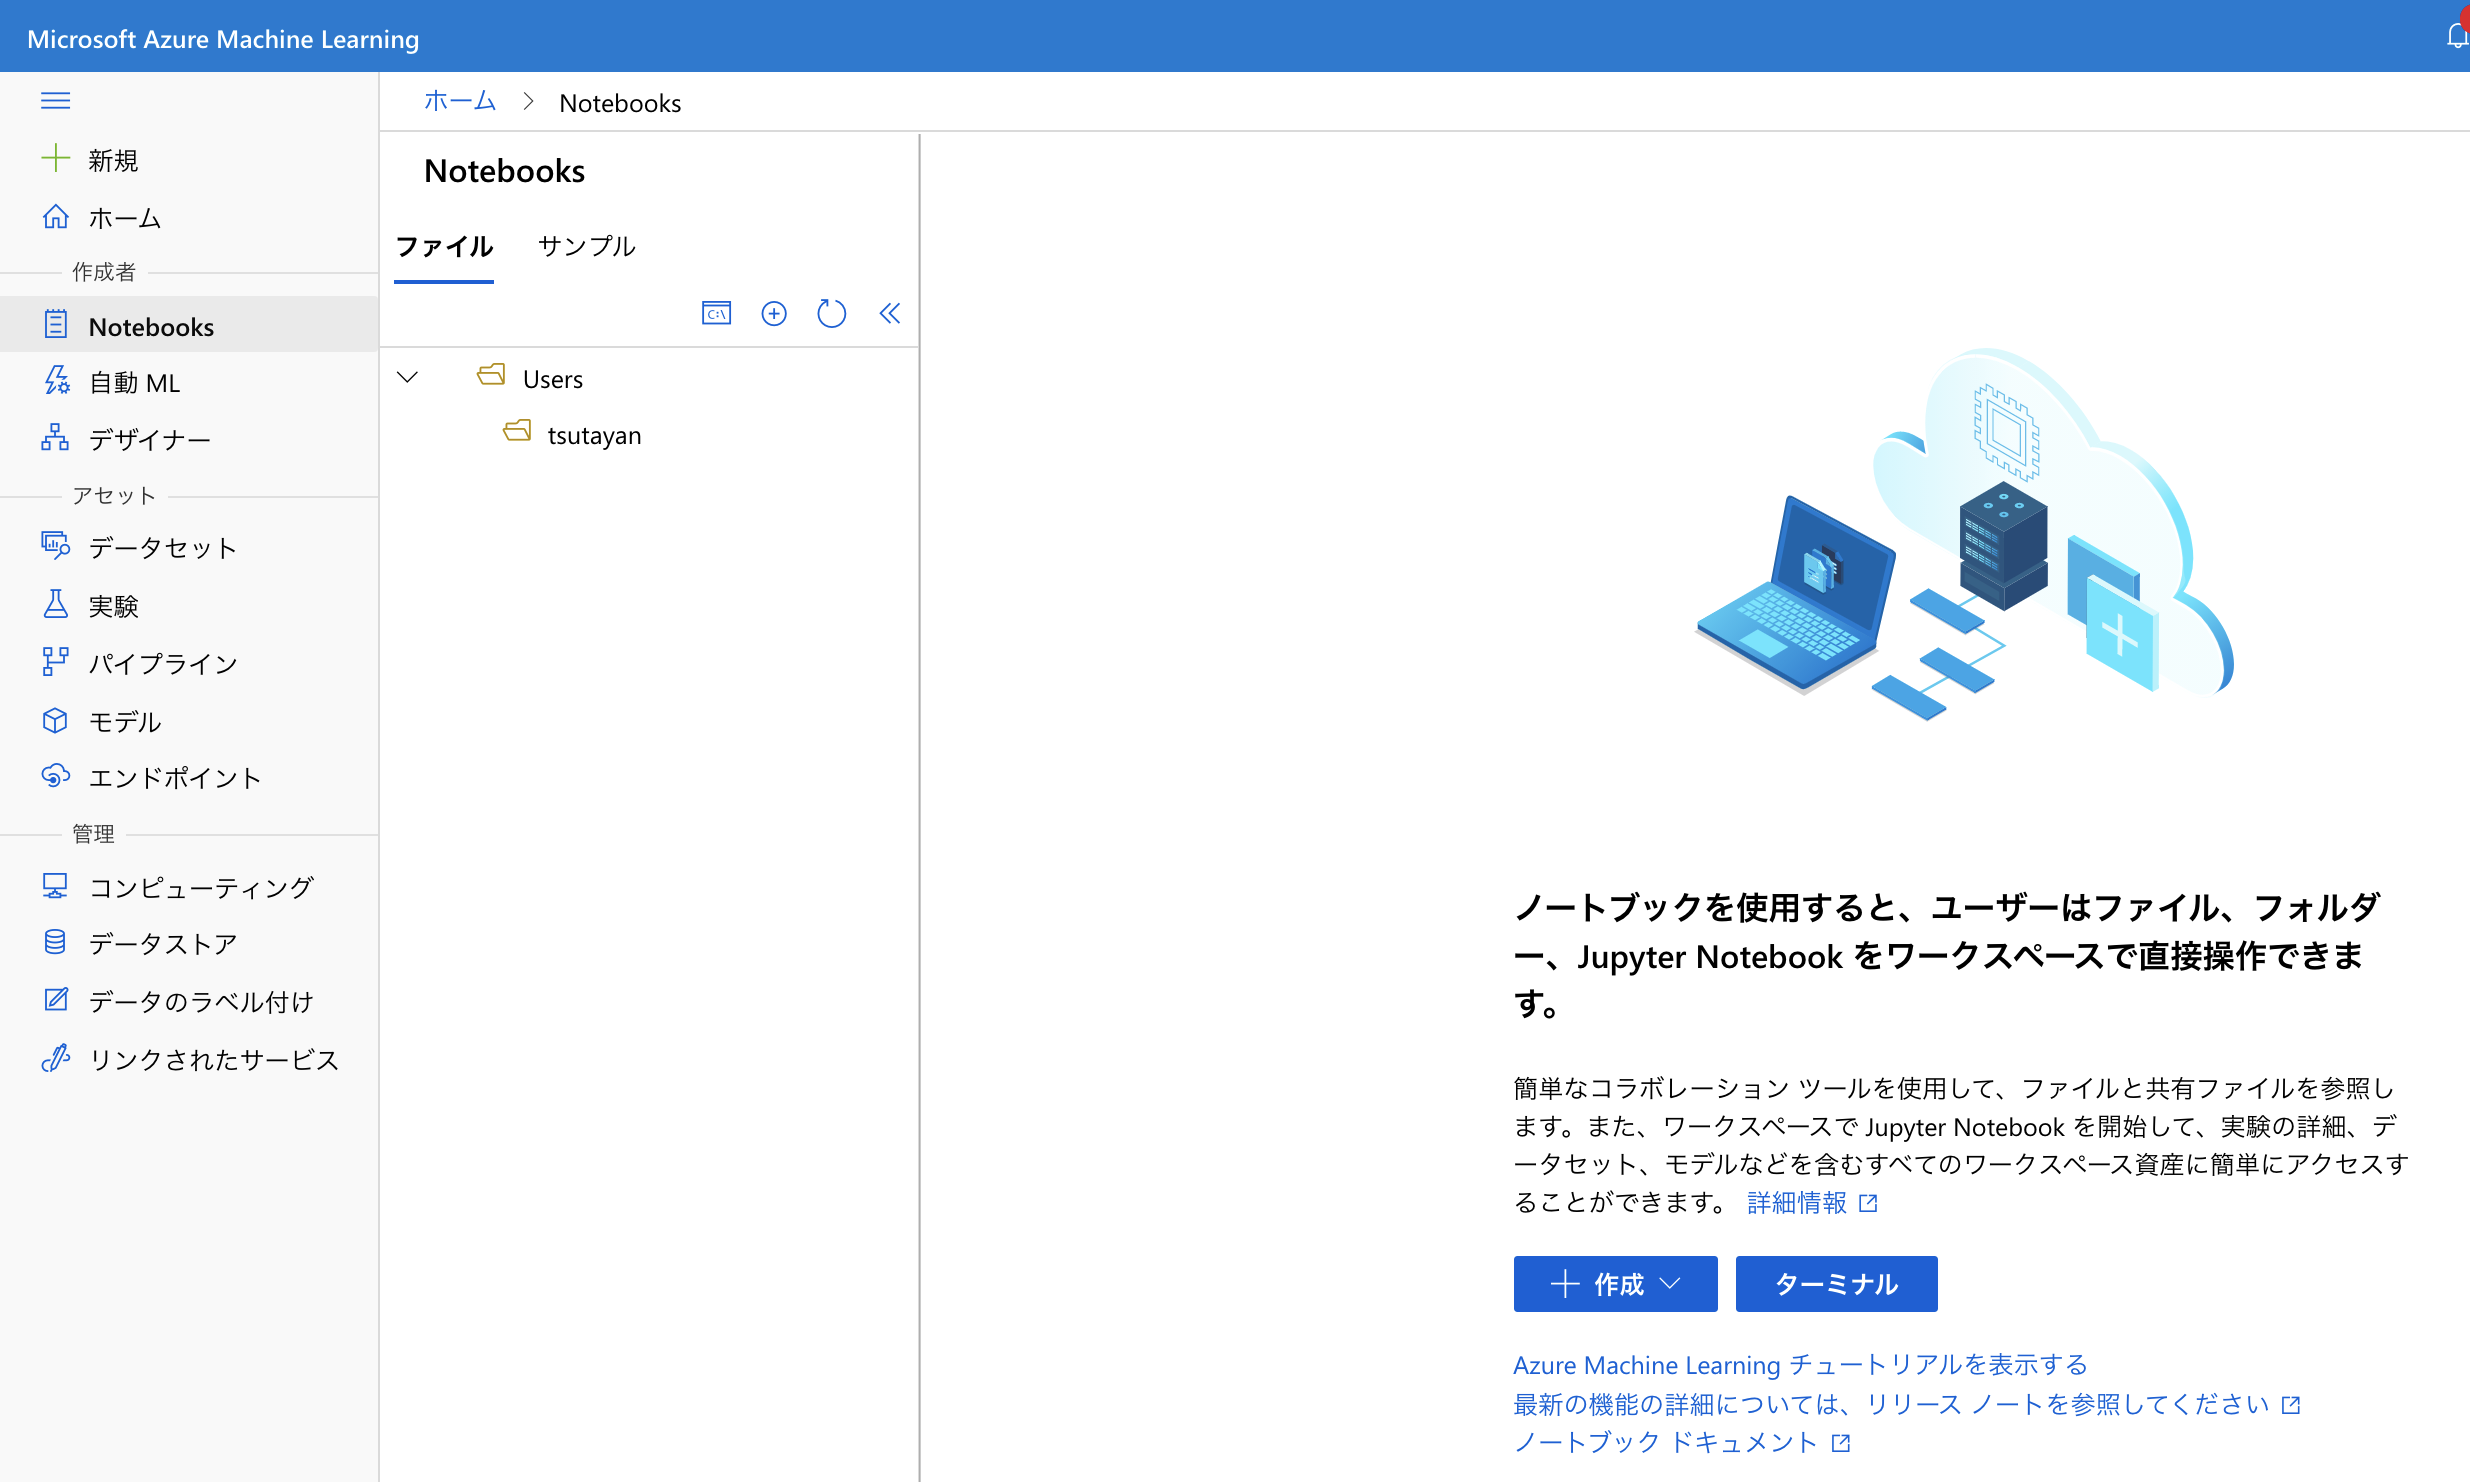

2. ターミナルを開き、`git`コマンドでノートブックのクローンを取得する

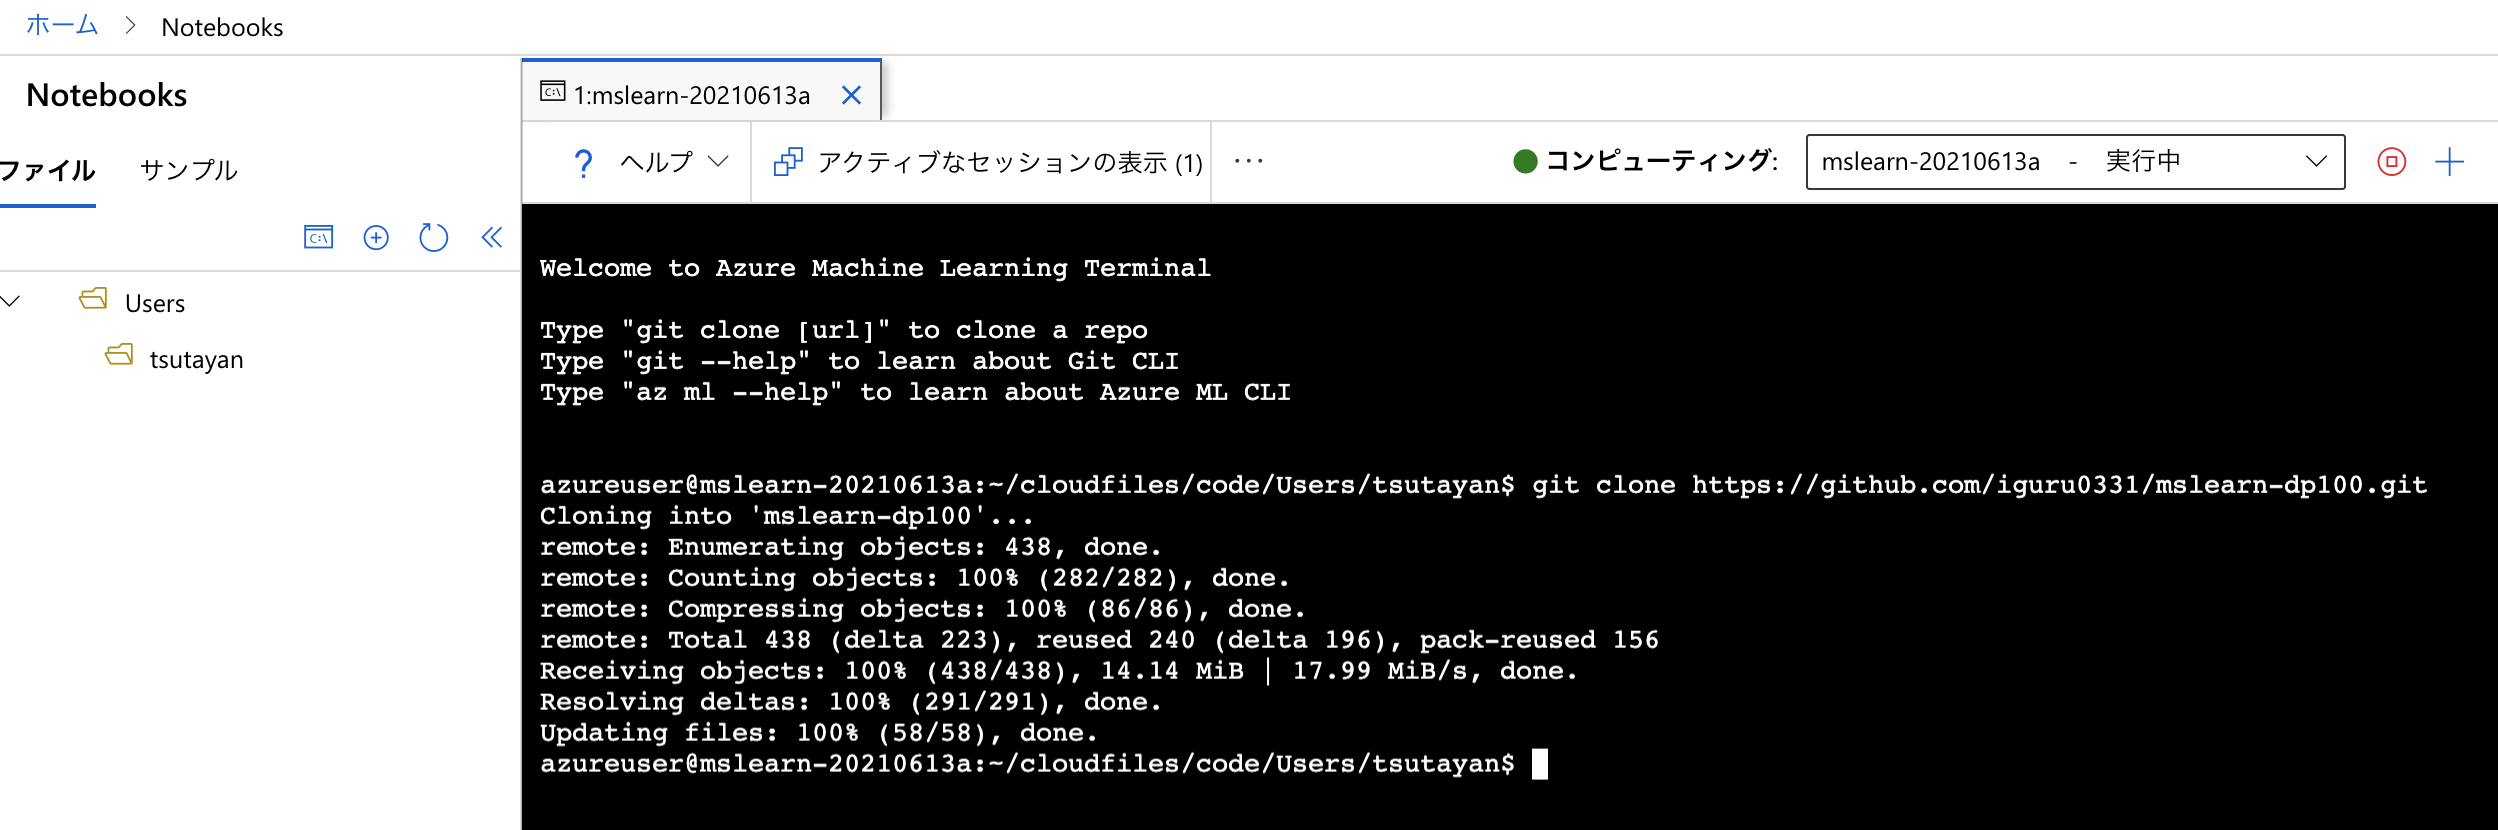

3. ターミナルを閉じ、ファイルペイン上で更新してからノートブックを選択することで、ノートブックを開くことができる。

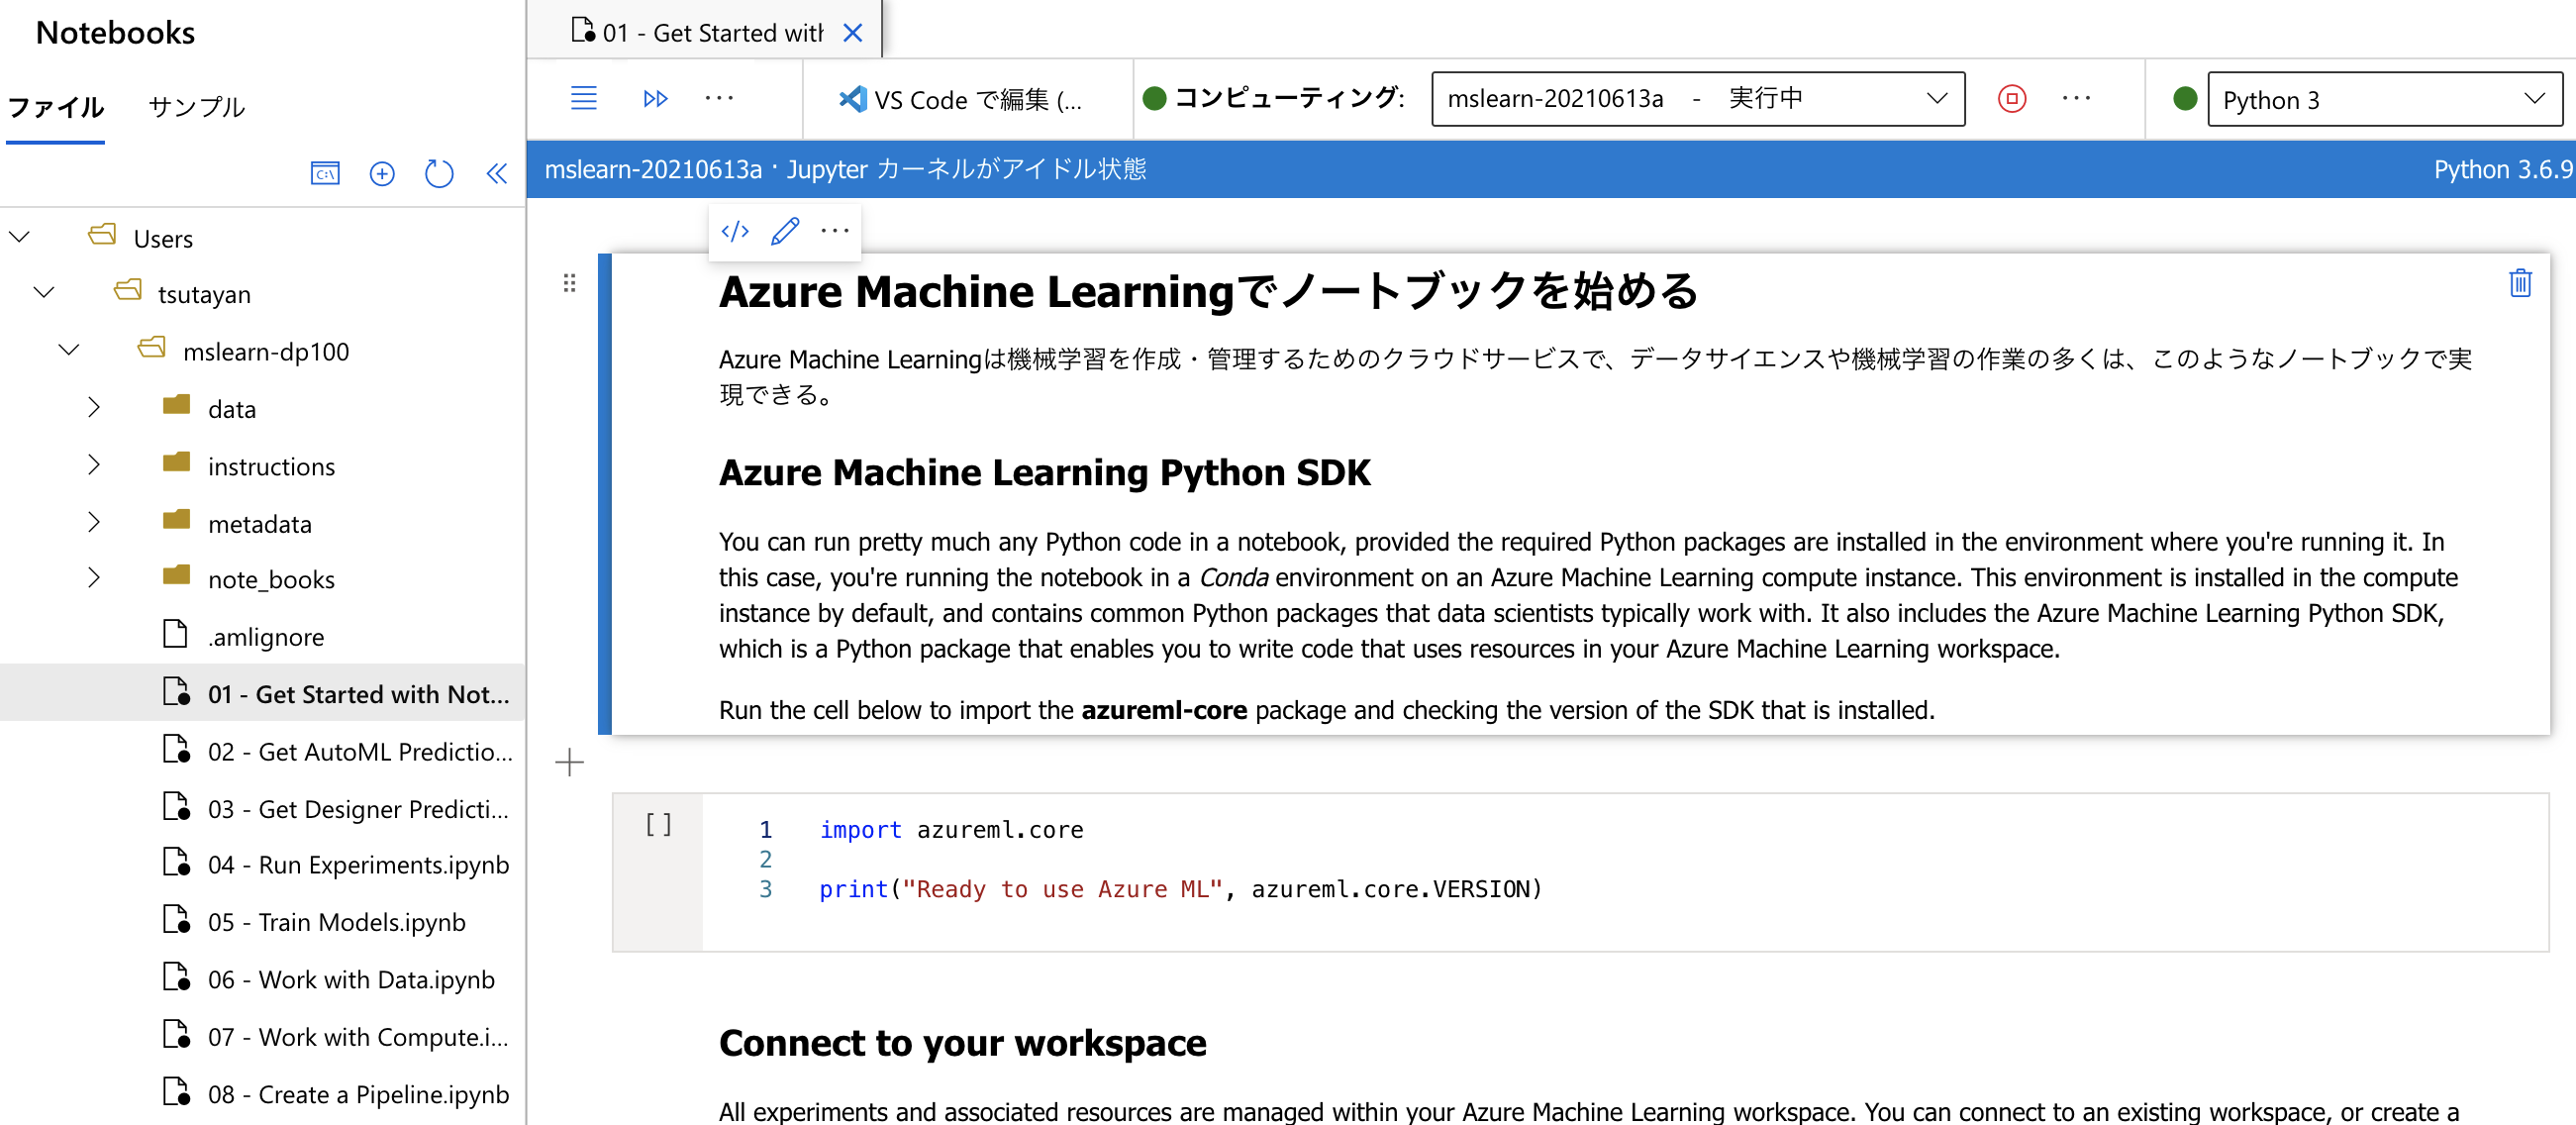

test